In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Data loading

In [2]:
df = pd.read_json('results.jl', lines=True, dtype={'note' : float, 'nombre_partages' : int, 'nombre_personnes' : int})
df = df.drop_duplicates(subset='url')

In [3]:
df.head()

,auteur,budget,ingredients,niveau,nombre_ajouts_carnets,nombre_commentaires,nombre_partages,nombre_personnes,note,tags,temps,titre,type,url
0,Anonyme,bon marché,"{'g de farine': '300', ' oeufs': '3', 'cuillèr...",facile,28k,530 commentaires,2839,15,3.8,"[Végétarien, Crêpe, Pâte à crêpes, Chandeleur]",NaN,Pâte à crêpes,Dessert,https://www.marmiton.org/recettes/recette_pate...
1,Anonyme,bon marché,"{' pommes': '6', 'g de cassonade': '150', 'g d...",très facile,103k,1999 commentaires,479,6,4.8,"[Végétarien, Crumble, Crumble aux pommes, Les ...",NaN,Le crumble aux pommes du Chat qui Tousse,Dessert,https://www.marmiton.org/recettes/recette_le-c...
2,Elodie_1752,bon marché,"{'g de farine': '200', 'g de sucre': '30', ' o...",très facile,12k,120 commentaires,1051,15,4.2,[Gaufre],NaN,Gaufres faciles et légères,Dessert,https://www.marmiton.org/recettes/recette_gauf...
3,Marguerite_9,bon marché,"{'cl de crème fraîche liquide': '50', 'g de su...",très facile,17k,232 commentaires,105,2,4.5,"[Végétarien, Sans gluten, Rapide, Crème, Crème...",NaN,Crème Chantilly,Dessert,https://www.marmiton.org/recettes/recette_crem...
4,Celia_3,bon marché,"{' blancs d'oeuf': '4', 'g de sucre semoule': ...",très facile,72k,1426 commentaires,813,20,4.8,"[Végétarien, Sans gluten, Petits gâteaux, Gâte...",NaN,Meringue pour les nuls,Dessert,https://www.marmiton.org/recettes/recette_meri...


# 2. Data cleaning
First we transform the number of comment into integers.

In [4]:
df['nombre_commentaires'] = pd.to_numeric(df['nombre_commentaires'].str.strip('s').str.strip(' commentaire'))

We then convert the number of 'ajouts_carnets' ('adding to personal records') into integers.

In [5]:
def transform_ajout(string):
    return int(float(string.strip('k'))*10**3)

In [6]:
df['nombre_ajouts_carnets'] = df['nombre_ajouts_carnets'].apply(transform_ajout)

Adding a column counting the number of ingredients in a recipe

In [7]:
def number_ingredients(dic):
    return len(dic)
df['nombre_ingredients'] = df['ingredients'].apply(number_ingredients)

In [8]:
df.head()

,auteur,budget,ingredients,niveau,nombre_ajouts_carnets,nombre_commentaires,nombre_partages,nombre_personnes,note,tags,temps,titre,type,url,nombre_ingredients
0,Anonyme,bon marché,"{'g de farine': '300', ' oeufs': '3', 'cuillèr...",facile,28000,530,2839,15,3.8,"[Végétarien, Crêpe, Pâte à crêpes, Chandeleur]",NaN,Pâte à crêpes,Dessert,https://www.marmiton.org/recettes/recette_pate...,7
1,Anonyme,bon marché,"{' pommes': '6', 'g de cassonade': '150', 'g d...",très facile,103000,1999,479,6,4.8,"[Végétarien, Crumble, Crumble aux pommes, Les ...",NaN,Le crumble aux pommes du Chat qui Tousse,Dessert,https://www.marmiton.org/recettes/recette_le-c...,7
2,Elodie_1752,bon marché,"{'g de farine': '200', 'g de sucre': '30', ' o...",très facile,12000,120,1051,15,4.2,[Gaufre],NaN,Gaufres faciles et légères,Dessert,https://www.marmiton.org/recettes/recette_gauf...,6
3,Marguerite_9,bon marché,"{'cl de crème fraîche liquide': '50', 'g de su...",très facile,17000,232,105,2,4.5,"[Végétarien, Sans gluten, Rapide, Crème, Crème...",NaN,Crème Chantilly,Dessert,https://www.marmiton.org/recettes/recette_crem...,2
4,Celia_3,bon marché,"{' blancs d'oeuf': '4', 'g de sucre semoule': ...",très facile,72000,1426,813,20,4.8,"[Végétarien, Sans gluten, Petits gâteaux, Gâte...",NaN,Meringue pour les nuls,Dessert,https://www.marmiton.org/recettes/recette_meri...,2


# 3. Exploration

## 3.a Number of recipes by type

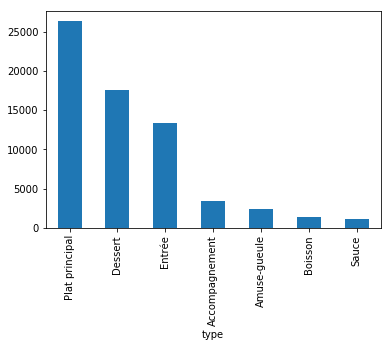

In [9]:
df_types = df.groupby('type').size()
df_types_sorted = df_types.sort_values(ascending=False)
df_types_sorted.plot(kind='bar')

## 3.b Number of recipes by difficulty

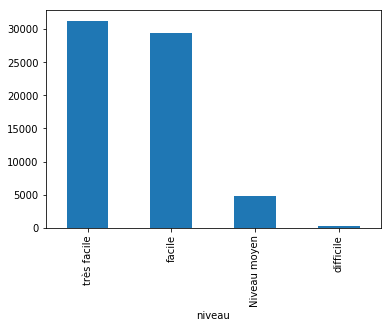

In [10]:
df_difficulty = df.groupby('niveau').size()
df_difficulty_sorted = df_difficulty.sort_values(ascending = False)
df_difficulty_sorted.plot(kind='bar')

People are not very fond of difficult recipes and tend to like easy or very easy recipes.

## 3.c Most popular recipes

First, we look at the top 10 recipes obtained by number of comments.

In [11]:
df.sort_values('nombre_commentaires', ascending=False)[['titre', 'type', 'note']].head(10)

,titre,type,note
2550,Ramequins fondants au chocolat,Dessert,4.8
423,'The' tarte au citron meringuée,Dessert,4.7
24,Tiramisu (recette originale),Dessert,4.8
45,Blanquette de veau facile,Plat principal,4.9
1,Le crumble aux pommes du Chat qui Tousse,Dessert,4.8
172,Gâteau au yaourt,Dessert,4.6
26,Véritable moelleux au chocolat,Dessert,4.6
16468,Les Timbales de Jeanne (saumon à la mousse de ...,Entrée,4.8
117,Gâteau aux pommes facile,Dessert,4.7
4,Meringue pour les nuls,Dessert,4.8


Then, regarding the top 100 recipes, we look at the favorite types of recipes.

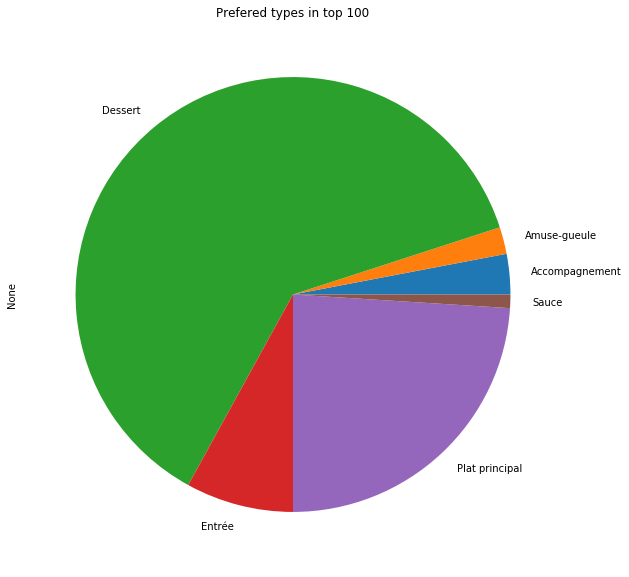

In [12]:
df.sort_values('nombre_commentaires', ascending=False).head(100).groupby('type').size().plot.pie(figsize=(10,10), title='Prefered types in top 100')